In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/Telco_Customer_Churn.csv')

# Preview the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0           1    Male              1     Yes         No       6           No   
1           2  Female              0      No         No      34           No   
2           3    Male              0      No         No      54          Yes   
3           4    Male              0      No         No      13           No   
4           5    Male              0      No        Yes       9           No   

      MultipleLines InternetService       OnlineSecurity  ...  \
0               Yes              No                  Yes  ...   
1  No phone service     Fiber optic  No internet service  ...   
2  No phone service              No                  Yes  ...   
3  No phone service     Fiber optic                  Yes  ...   
4  No phone service              No                  Yes  ...   

      DeviceProtection TechSupport          StreamingTV      StreamingMovies  \
0  No internet service         Yes              

In [2]:
# First, check for TotalCharges issues (sometimes TotalCharges can have blanks or wrong values)
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check again for missing values
print(df.isnull().sum())

# Drop rows with missing TotalCharges (small number, OK to drop)
df = df.dropna()

# Drop CustomerID (not useful for modeling)
df = df.drop(['CustomerID'], axis=1)

# Encode binary categorical variables (Yes/No → 1/0)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode Gender (Male/Female → 0/1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# One-hot encode multi-category columns
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Final check on data
print(df.head())
print(df.info())


CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
   Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0       0              1        1           0       6             0   
1       1              0        0           0      34             0   
2       0              0        0           0      54             1   
3       0              0        0           0      13             0   
4       0              0        0           1       9             0   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           70.

Accuracy: 0.645
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


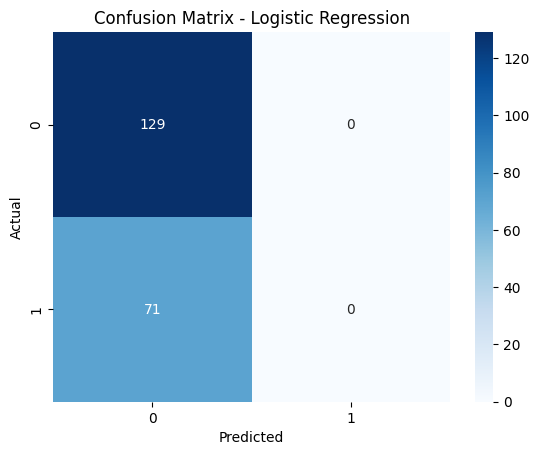

              precision    recall  f1-score   support

           0       0.65      1.00      0.78       129
           1       0.00      0.00      0.00        71

    accuracy                           0.65       200
   macro avg       0.32      0.50      0.39       200
weighted avg       0.42      0.65      0.51       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.65
Precision: 1.0
Recall: 0.014084507042253521
F1 Score: 0.027777777777777776


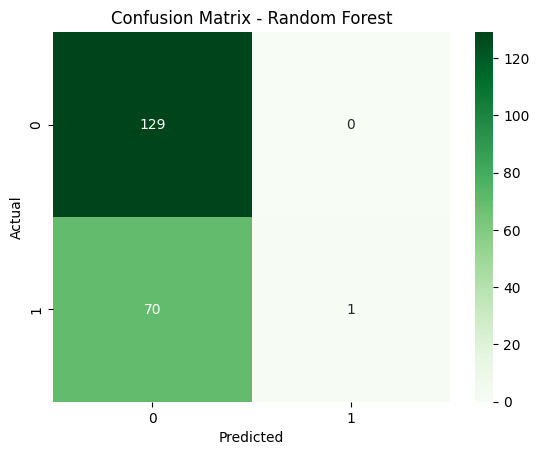

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       129
           1       1.00      0.01      0.03        71

    accuracy                           0.65       200
   macro avg       0.82      0.51      0.41       200
weighted avg       0.77      0.65      0.52       200



In [4]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rf))


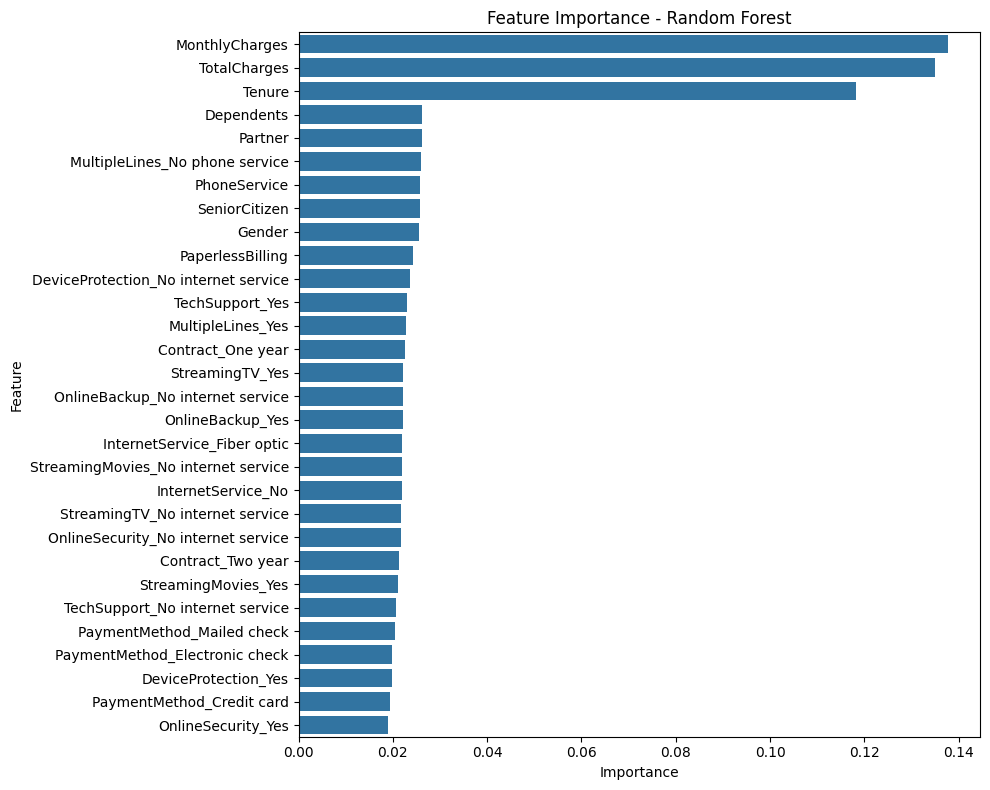

In [5]:
# Feature importance from Random Forest
importances = rf.feature_importances_
features = X.columns

# Create DataFrame for feature importance
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()
